# Imports

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from src.code import (
    load_datasets,
    build_frequency_model,
    predict_frequency_model,
    build_echo_chamber_model,
    predict_echo_chamber_model,
    build_sensationalism_model,
    predict_sensationalism_model,
    build_credibility_model,
    predict_credibility_model
)


# Load LiarPlus Dataset

In [3]:
train_path = "../data/train2.tsv"
val_path = "../data/val2.tsv"
test_path = "../data/test2.tsv"
df_train, df_val, df_test = load_datasets(
    train_path, val_path, test_path
) #preprocessing was done in load_datasets


In [4]:
df_train.head()

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,context,justification
0,2635,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,10540,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,324,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,1123,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,9028,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


In [5]:
df_train.shape

(10240, 15)

In [6]:
df_val.shape

(1284, 15)

In [7]:
df_test.shape

(1267, 15)

# Frequency Heuristic

In [8]:
train_freq = df_train.copy()
val_freq   = df_val.copy()
test_freq  = df_test.copy()

In [9]:
model_freq, tfidf_freq, count_vec_freq, token_dict_freq, buzzwords_freq, le_freq = build_frequency_model(train_freq)

val_results = predict_frequency_model(val_freq, model_freq, tfidf_freq, count_vec_freq, token_dict_freq, buzzwords_freq, le_freq)
test_results = predict_frequency_model(test_freq, model_freq, tfidf_freq, count_vec_freq, token_dict_freq, buzzwords_freq, le_freq)

print(val_results.head())

      id                                          statement predicted_label  \
0  12134  We have less Americans working now than in the...       half-true   
1    238  When Obama was sworn into office, he DID NOT u...       half-true   
2   7891  Says Having organizations parading as being so...            true   
3   8169     Says nearly half of Oregons children are poor.     barely-true   
4    929  On attacks by Republicans that various program...           false   

   frequency_heuristic_score  
0                      0.335  
1                      0.290  
2                      0.390  
3                      0.320  
4                      0.265  


# Echo Chamber

In [10]:
train_echo = df_train.copy()
val_echo   = df_val.copy()
test_echo  = df_test.copy()

In [11]:
model_echo, vectorizer_echo, le_echo, concentration_map = build_echo_chamber_model(train_echo)

val_results_echo = predict_echo_chamber_model(val_echo, model_echo, vectorizer_echo, le_echo, concentration_map)
print(val_results_echo.head())

test_results_echo = predict_echo_chamber_model(test_echo, model_echo, vectorizer_echo, le_echo, concentration_map)
print(test_results_echo.head())

      id                                          statement  \
0  12134  We have less Americans working now than in the...   
1    238  When Obama was sworn into office, he DID NOT u...   
2   7891  Says Having organizations parading as being so...   
3   8169     Says nearly half of Oregons children are poor.   
4    929  On attacks by Republicans that various program...   

   predicted_echo_class  echo_chamber_score  
0                     1            0.390628  
1                     0            0.528556  
2                     3            0.794744  
3                     1            0.606419  
4                     2            0.626083  
      id                                          statement  \
0  11972  Building a wall on the U.S.-Mexico border will...   
1  11685  Wisconsin is on pace to double the number of l...   
2  11096  Says John McCain has done nothing to help the ...   
3   5209  Suzanne Bonamici supports a plan that will cut...   
4   9524  When asked by a repo

# Sensationalism

In [12]:
train_sens = df_train.copy()
val_sens   = df_val.copy()
test_sens  = df_test.copy()

In [13]:
sens_pipeline, sens_preproc, sens_meta, sens_num = build_sensationalism_model(train_sens, val_sens, test_sens)

val_results_sens = predict_sensationalism_model(val_sens, sens_pipeline, sens_preproc, sens_meta, sens_num)
test_results_sens = predict_sensationalism_model(test_sens, sens_pipeline, sens_preproc, sens_meta, sens_num)


In [14]:
print(val_results_sens.head())

      id                                          statement  \
0  12134  We have less Americans working now than in the...   
1    238  When Obama was sworn into office, he DID NOT u...   
2   7891  Says Having organizations parading as being so...   
3   8169     Says nearly half of Oregons children are poor.   
4    929  On attacks by Republicans that various program...   

   predicted_sensationalism  sensationalism_score  
0                         1              0.667148  
1                         2              0.966101  
2                         1              0.464299  
3                         2              0.371510  
4                         0              0.989111  


In [15]:
print(test_results_sens.head())

      id                                          statement  \
0  11972  Building a wall on the U.S.-Mexico border will...   
1  11685  Wisconsin is on pace to double the number of l...   
2  11096  Says John McCain has done nothing to help the ...   
3   5209  Suzanne Bonamici supports a plan that will cut...   
4   9524  When asked by a reporter whether hes at the ce...   

   predicted_sensationalism  sensationalism_score  
0                         1              0.962099  
1                         1              0.495025  
2                         1              0.972290  
3                         1              0.856281  
4                         2              0.830202  


# Credibility

In [16]:
train_cred = df_train.copy()
val_cred   = df_val.copy()
test_cred  = df_test.copy()

In [17]:
cred_pipeline, party_enc_cred = build_credibility_model(train_cred, val_cred, test_cred)

val_results_cred = predict_credibility_model(val_cred, cred_pipeline, party_enc_cred)
test_results_cred = predict_credibility_model(test_cred, cred_pipeline, party_enc_cred)


# Overview Dashboards

In [18]:
PALETTE = sns.color_palette("husl", 8)
_color_index = 0

In [19]:
def overview_dashboard(results_df, model_name, score_col, bins=20, kde=True):
    global _color_index
    if score_col not in results_df.columns:
        print(f"Column '{score_col}' not found in DataFrame.")
        return

    color = PALETTE[_color_index % len(PALETTE)]
    _color_index += 1

    plt.figure(figsize=(8, 5))
    sns.histplot(results_df[score_col], bins=bins, kde=kde, color=color)
    plt.title(f"{model_name} Score Distribution", fontsize=14, fontweight='bold', color=color)
    plt.xlabel("Score (0–1)")
    plt.ylabel("Count")
    plt.show()

    mean_score = results_df[score_col].mean()
    median_score = results_df[score_col].median()
    std_score = results_df[score_col].std()
    high_conf_pct = (results_df[score_col] > 0.8).mean() * 100

    print(f"{model_name} Summary Statistics:")
    print(f"   • Mean Score: {mean_score:.3f}")
    print(f"   • Median Score: {median_score:.3f}")
    print(f"   • Std. Deviation: {std_score:.3f}")
    print(f"   • % High-Confidence (Score > 0.8): {high_conf_pct:.1f}%")

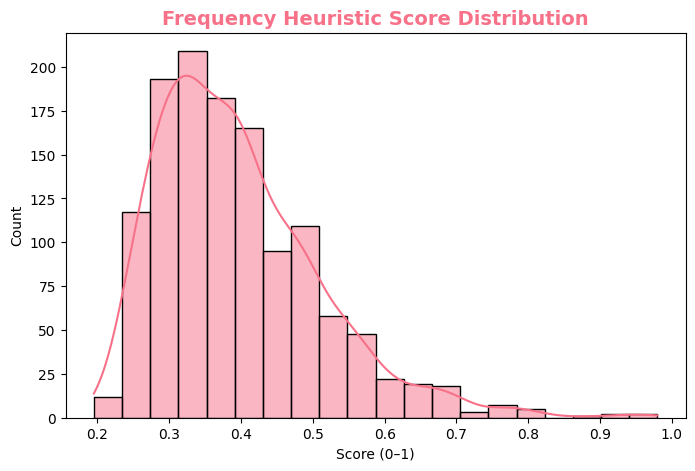

Frequency Heuristic Summary Statistics:
   • Mean Score: 0.396
   • Median Score: 0.375
   • Std. Deviation: 0.115
   • % High-Confidence (Score > 0.8): 0.6%


In [20]:
overview_dashboard(test_results, "Frequency Heuristic", "frequency_heuristic_score")

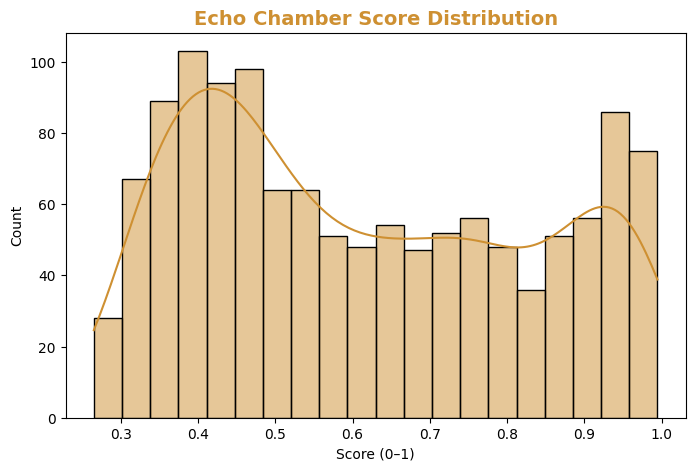

Echo Chamber Summary Statistics:
   • Mean Score: 0.614
   • Median Score: 0.574
   • Std. Deviation: 0.216
   • % High-Confidence (Score > 0.8): 25.6%


In [21]:
overview_dashboard(test_results_echo, "Echo Chamber", "echo_chamber_score")

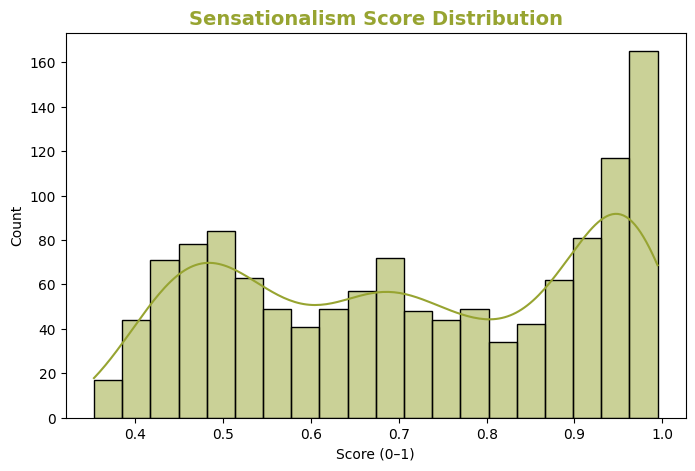

Sensationalism Summary Statistics:
   • Mean Score: 0.716
   • Median Score: 0.711
   • Std. Deviation: 0.199
   • % High-Confidence (Score > 0.8): 40.0%


In [22]:
overview_dashboard(test_results_sens, "Sensationalism", "sensationalism_score")

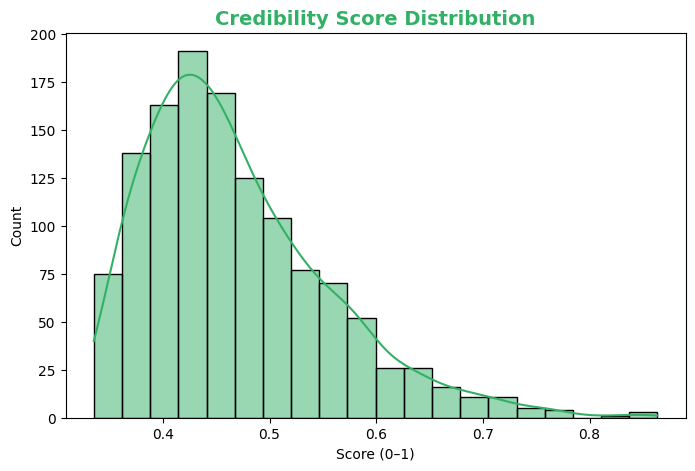

Credibility Summary Statistics:
   • Mean Score: 0.469
   • Median Score: 0.451
   • Std. Deviation: 0.087
   • % High-Confidence (Score > 0.8): 0.3%


In [23]:
overview_dashboard(test_results_cred, "Credibility", "credibility_score")

In [24]:
metrics_list = [
    {
        "Model": "Frequency Heuristic",
        "Accuracy": accuracy_score(df_test["label"], test_results["predicted_label"]),
        "Precision": precision_score(df_test["label"], test_results["predicted_label"], average='weighted', zero_division=0),
        "Recall": recall_score(df_test["label"], test_results["predicted_label"], average='weighted', zero_division=0),
        "F1": f1_score(df_test["label"], test_results["predicted_label"], average='weighted', zero_division=0)
    },
    {
        "Model": "Sensationalism",
        "Accuracy": accuracy_score(test_sens["sensationalism"], test_results_sens["predicted_sensationalism"]),
        "Precision": precision_score(test_sens["sensationalism"], test_results_sens["predicted_sensationalism"], average='weighted', zero_division=0),
        "Recall": recall_score(test_sens["sensationalism"], test_results_sens["predicted_sensationalism"], average='weighted', zero_division=0),
        "F1": f1_score(test_sens["sensationalism"], test_results_sens["predicted_sensationalism"], average='weighted', zero_division=0)
    },
    {
        "Model": "Credibility",
        "Accuracy": accuracy_score(test_cred["credibility"], test_results_cred["predicted_credibility"]),
        "Precision": precision_score(test_cred["credibility"], test_results_cred["predicted_credibility"], average='weighted', zero_division=0),
        "Recall": recall_score(test_cred["credibility"], test_results_cred["predicted_credibility"], average='weighted', zero_division=0),
        "F1": f1_score(test_cred["credibility"], test_results_cred["predicted_credibility"], average='weighted', zero_division=0)
    }
]

In [25]:
metrics_df = pd.DataFrame(metrics_list)
display(metrics_df.style.background_gradient(cmap="Greens").format(precision=3))

,Model,Accuracy,Precision,Recall,F1
0,Frequency Heuristic,0.194,0.190,0.194,0.191
1,Sensationalism,0.778,0.788,0.778,0.769
2,Credibility,0.437,0.437,0.437,0.434


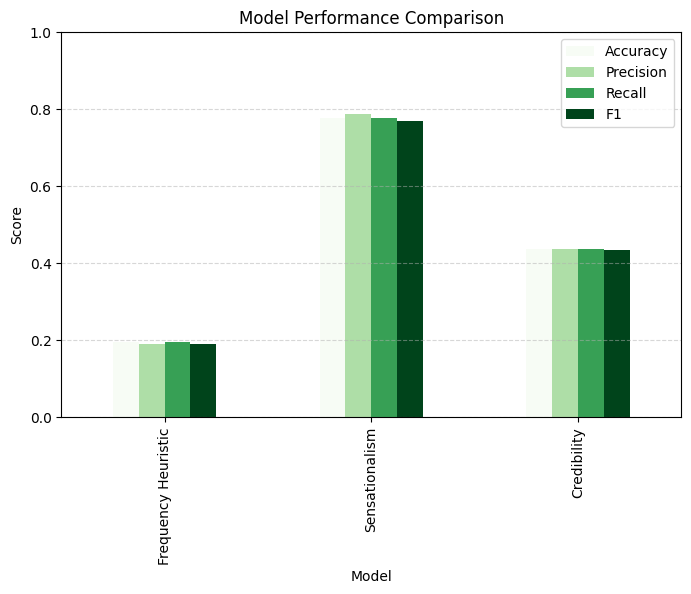

In [26]:
metrics_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1"]].plot(kind="bar", figsize=(8,5), colormap="Greens")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [27]:
echo_summary = {
    "Mean Confidence": test_results_echo["echo_chamber_score"].mean(),
    "Median Confidence": test_results_echo["echo_chamber_score"].median(),
    "High-Confidence % (>0.8)": (test_results_echo["echo_chamber_score"] > 0.8).mean() * 100,
    "Low-Confidence % (<0.5)": (test_results_echo["echo_chamber_score"] < 0.5).mean() * 100
}

In [28]:
print("Echo Chamber Confidence Summary:")
for k, v in echo_summary.items():
    print(f"   {k}: {v:.2f}")

Echo Chamber Confidence Summary:
   Mean Confidence: 0.61
   Median Confidence: 0.57
   High-Confidence % (>0.8): 25.57
   Low-Confidence % (<0.5): 40.09


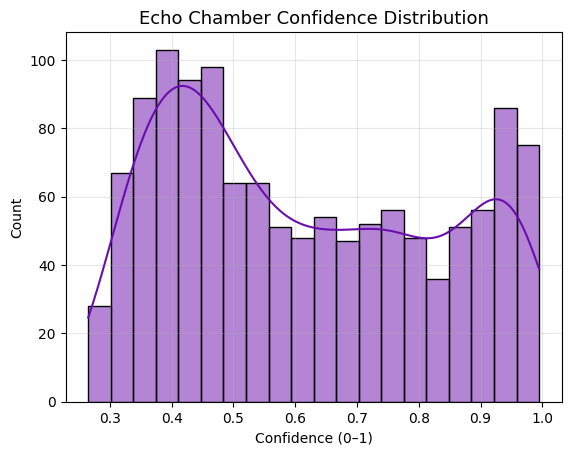

In [29]:
sns.histplot(test_results_echo["echo_chamber_score"], bins=20, kde=True, color="#6A0DAD")
plt.title("Echo Chamber Confidence Distribution", fontsize=13)
plt.xlabel("Confidence (0–1)")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

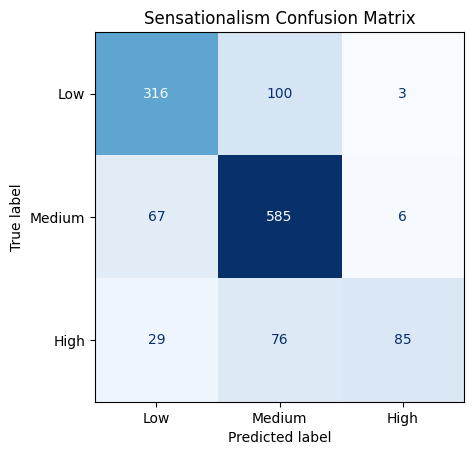

In [31]:
ConfusionMatrixDisplay.from_predictions(
    test_sens["sensationalism"],
    test_results_sens["predicted_sensationalism"],
    display_labels=["Low","Medium","High"],
    cmap="Blues", colorbar=False
)
plt.title("Sensationalism Confusion Matrix")
plt.show()

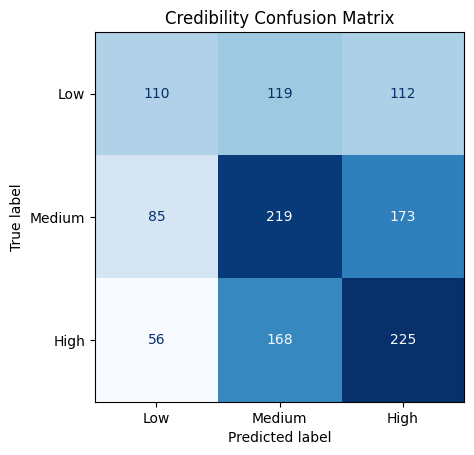

In [32]:
ConfusionMatrixDisplay.from_predictions(
    test_cred["credibility"],
    test_results_cred["predicted_credibility"],
    display_labels=["Low","Medium","High"],
    cmap="Blues", colorbar=False
)
plt.title("Credibility Confusion Matrix")
plt.show()

In [33]:
def plot_multiclass_roc(y_true, y_prob, model_name, n_classes=3, colors=None):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
    plt.figure(figsize=(7,5))

    if colors is None:
        colors = sns.color_palette("husl", n_classes)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=colors[i], label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0,1],[0,1],'k--',lw=1)
    plt.title(f"{model_name} – ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

/Users/amelialei/miniforge3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amelialei/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


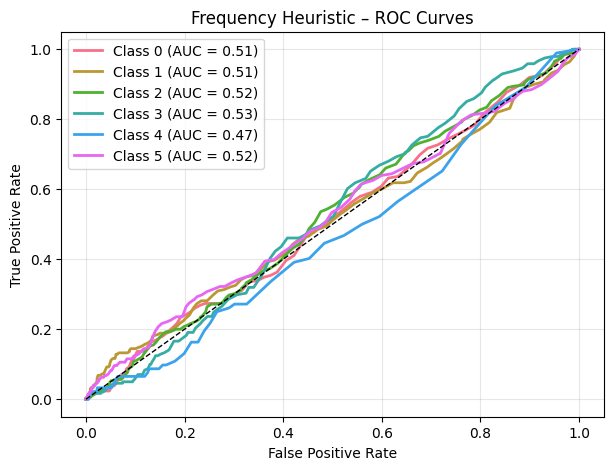

In [34]:
X_test_freq = pd.DataFrame({
    "tfidf_mean": tfidf_freq.transform(df_test["statement"]).mean(axis=1).A1,
    "word_freq_mean": df_test["statement"].apply(lambda x: np.mean([token_dict_freq[w] for w in x.lower().split() if w in token_dict_freq]) if x else 0),
    "buzzword_score": df_test["statement"].apply(lambda x: sum(b in x.lower() for b in buzzwords_freq)),
    "repetition_score": df_test["statement"].apply(lambda x: 1 - len(set(x.lower().split()))/len(x.lower().split()) if x else 0)
}).fillna(0)

y_true_freq = le_freq.transform(df_test["label"])
y_prob_freq = model_freq.predict_proba(X_test_freq)

plot_multiclass_roc(y_true_freq, y_prob_freq, "Frequency Heuristic", n_classes=len(le_freq.classes_))

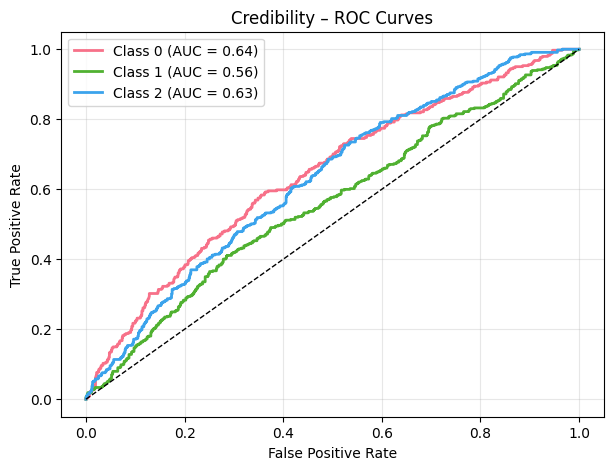

In [35]:
X_test_cred = test_cred[["statement","party_encoded","expertise_level","subjectivity"]]
y_true_cred = test_cred["credibility"]
y_prob_cred = cred_pipeline.predict_proba(X_test_cred)

plot_multiclass_roc(y_true_cred, y_prob_cred, "Credibility", n_classes=3)